<a href="https://colab.research.google.com/github/rohandawar/pyspark/blob/main/Pyspark_google_Colab_Primer_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am trying to do the correlation analysis using pyspark, also the initial cells install the pyspark and handles the data imports

## Install Pyspark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=a80a24c4495aac1d3edd5e0f1712eb855137d9533473848a667ebf16d5a99a7a
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
# ImportSpark Session & Start a spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CorrelationAnalysis').getOrCreate()

## Import Libs

In [3]:
# Import Libs
from pyspark.sql.functions import *

In [4]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import Libs
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# PLotting
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Function defination for plotting the correlation matrix
def plot_corr_matrix(correlations,attr,fig_no):
  fig=plt.figure(fig_no)
  ax = fig.add_subplot(111)
  ax.set_title('Corelation Matrix for the Attributes')
  ax.set_xticklabels(['']+attr)
  ax.set_yticklabels(['']+attr)
  cax = ax.matshow(correlations,vmax=1, vmin=-1)
  fig.colorbar(cax)
  plt.show()

# An improvment on the above function
def plot_corr_matrix_seaborn(correlations, attr,fig_no):
  fig = plt.figure(fig_no)
  fig.suptitle('Correlation Matrix for the attributes using Seaborn')
  sns.heatmap(correlations,
              xticklabels=attr,
              yticklabels=attr,
              cmap='coolwarm',
              vmin=-1,
              vmax=1,
              annot=True,
              fmt='.2f',
              cbar_kws={'label':'Correlation'})
  plt.show()

In [7]:
# Read the data
path = '/content/drive/MyDrive/DataSets_Pyspark_GoogleColab_Primer/Boston.csv' # Path for the items in the google drive
df1 = spark.read.csv(path, inferSchema=True, header=True).drop('_c0')
df1.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [8]:
# check the schema for the dataframe
df1.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [21]:
# retain all the numeric columns and convert to pandas dataframe
numeric_features = [fields for (fields,dataType) in df1.dtypes if dataType !='string']

# Creating a df with only the numeric features
numeric_features_df=df1.select(numeric_features)

# Convert to Pandas & check the head
numeric_features_df.toPandas().head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Correlation

In [10]:
df1.stat.corr('crim', 'medv')

-0.38830460858681154

In [11]:
# Create a list of Variable for which we have to calculate the correlation
Variables_Corr = ['crim','zn',
'indus','chas','nox','tax','ptratio','black','lstat',
'rm','age','dis','rad','medv']

In [12]:
vector_col = 'corr_features'
assembler = VectorAssembler(inputCols=Variables_Corr,
                            outputCol=vector_col)

In [13]:
Mygraph_Vector = assembler.transform(df1).select(vector_col)
Mygraph_Vector.show(truncate=False)

+---------------------------------------------------------------------------------+
|corr_features                                                                    |
+---------------------------------------------------------------------------------+
|[0.00632,18.0,2.31,0.0,0.538,296.0,15.3,396.9,4.98,6.575,65.2,4.09,1.0,24.0]     |
|[0.02731,0.0,7.07,0.0,0.469,242.0,17.8,396.9,9.14,6.421,78.9,4.9671,2.0,21.6]    |
|[0.02729,0.0,7.07,0.0,0.469,242.0,17.8,392.83,4.03,7.185,61.1,4.9671,2.0,34.7]   |
|[0.03237,0.0,2.18,0.0,0.458,222.0,18.7,394.63,2.94,6.998,45.8,6.0622,3.0,33.4]   |
|[0.06905,0.0,2.18,0.0,0.458,222.0,18.7,396.9,5.33,7.147,54.2,6.0622,3.0,36.2]    |
|[0.02985,0.0,2.18,0.0,0.458,222.0,18.7,394.12,5.21,6.43,58.7,6.0622,3.0,28.7]    |
|[0.08829,12.5,7.87,0.0,0.524,311.0,15.2,395.6,12.43,6.012,66.6,5.5605,5.0,22.9]  |
|[0.14455,12.5,7.87,0.0,0.524,311.0,15.2,396.9,19.15,6.172,96.1,5.9505,5.0,27.1]  |
|[0.21124,12.5,7.87,0.0,0.524,311.0,15.2,386.63,29.93,5.631,100.0,6.0821,5.0

In [14]:
# creating a matix for the correlation
matrix = Correlation.corr(Mygraph_Vector, vector_col)
matrix.collect()[0]["pearson({})".format(vector_col)].values

array([ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        0.58276431,  0.28994558, -0.38506394,  0.45562148, -0.2192467 ,
        0.35273425, -0.37967009,  0.62550515, -0.38830461, -0.20046922,
        1.        , -0.53382819, -0.04269672, -0.51660371, -0.31456332,
       -0.39167855,  0.17552032, -0.41299457,  0.31199059, -0.56953734,
        0.66440822, -0.31194783,  0.36044534,  0.40658341, -0.53382819,
        1.        ,  0.06293803,  0.76365145,  0.72076018,  0.38324756,
       -0.35697654,  0.60379972, -0.39167585,  0.64477851, -0.70802699,
        0.59512927, -0.48372516, -0.05589158, -0.04269672,  0.06293803,
        1.        ,  0.09120281, -0.03558652, -0.12151517,  0.04878848,
       -0.0539293 ,  0.09125123,  0.08651777, -0.09917578, -0.00736824,
        0.17526018,  0.42097171, -0.51660371,  0.76365145,  0.09120281,
        1.        ,  0.6680232 ,  0.18893268, -0.38005064,  0.59087892,
       -0.30218819,  0.7314701 , -0.76923011,  0.61144056, -0.42

In [15]:
matrix = Correlation.corr(Mygraph_Vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

In [16]:
# create a dataframe
df = spark.createDataFrame(corrmatrix, df1.columns)
df.show()

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                crim|                  zn|               indus|                chas|                nox|                  rm|                 age|                 dis|                 rad|                 tax|             ptratio|               black|               lstat|                medv|
+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-0.20046921966254821| 0.40658341140625986|-0.05589158222224122|0.42097171139245615|  0.582764

<ipython-input-6-48d0c5e9f215>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+attr)
<ipython-input-6-48d0c5e9f215>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+attr)


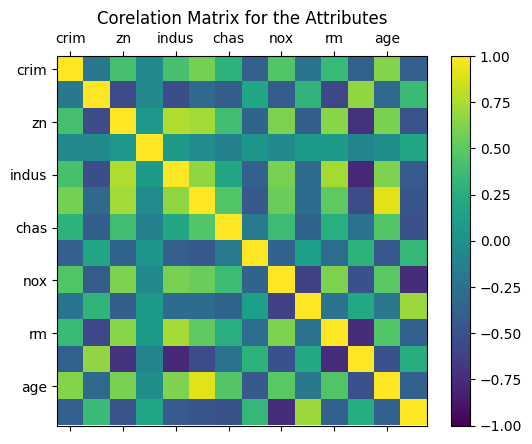

In [17]:
# Plotting the correlation matix
plot_corr_matrix(corrmatrix, df1.columns,234)

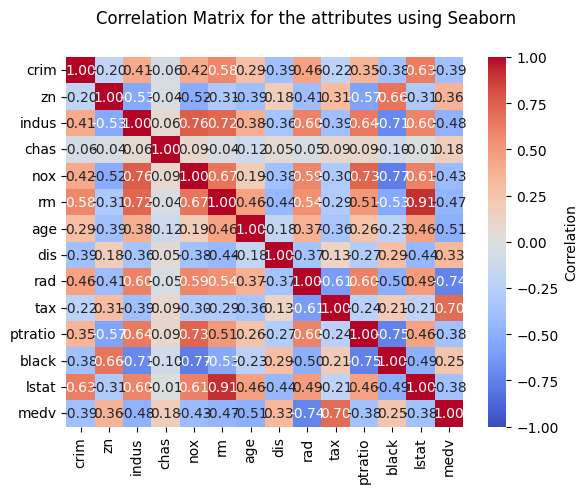

In [20]:
# Plotting the correlation matix using Seaborn
plot_corr_matrix_seaborn(corrmatrix, df1.columns,686)